In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.sparse import csr_matrix

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer

# Evaluation
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

# Baseline+overview+review

In [3]:
train = pd.read_csv('train_process_2.csv')
test = pd.read_csv('test_process_2.csv')

In [3]:
train.head()

,isAdult,runtime,budget,revenue,type_movie,type_short,type_tvEpisode,type_tvMiniSeries,type_tvMovie,type_tvSeries,...,760,761,762,763,764,765,766,767,sentiment_score,averageRating
0,0,-0.553539,-0.26443,-0.190517,1,0,0,0,0,0,...,0.180402,-0.309614,-0.109253,-0.083931,-0.124375,-0.049131,0.448019,0.212206,0.385075,5.6
1,0,-0.020035,0.52012,0.682158,1,0,0,0,0,0,...,0.037835,-0.344181,-0.057734,0.087253,-0.018626,-0.022519,0.800948,0.356451,0.237056,6.1
2,0,-0.104272,-0.26443,-0.190673,1,0,0,0,0,0,...,-0.030777,-0.322845,-0.061202,0.305364,-0.348252,-0.281722,0.328683,0.157720,-0.939000,5.3
3,0,-0.216589,-0.26443,-0.190673,1,0,0,0,0,0,...,-0.032892,-0.349964,-0.195581,0.195616,-0.037520,-0.173880,0.454948,0.368299,0.596515,4.4
4,0,0.288836,-0.26443,-0.190673,1,0,0,0,0,0,...,-0.070856,-0.477748,-0.230749,0.008394,-0.032509,-0.091296,0.341122,0.329087,0.749380,5.9


In [4]:
train['highRating'] = np.where(train['averageRating'] >= 6.5,1,0)
test['highRating'] = np.where(test['averageRating'] >= 6.5,1,0)

In [5]:
X_train = train.drop(columns = ['highRating','averageRating'])
y_train = train['highRating']
X_test = test.drop(columns = ['highRating','averageRating'])
y_test = test['highRating']

In [16]:
X_train

,isAdult,runtime,budget,revenue,type_movie,type_short,type_tvEpisode,type_tvMiniSeries,type_tvMovie,type_tvSeries,...,759,760,761,762,763,764,765,766,767,sentiment_score
0,0,-0.553539,-0.264430,-0.190517,1,0,0,0,0,0,...,-0.328453,0.180402,-0.309614,-0.109253,-0.083931,-0.124375,-0.049131,0.448019,0.212206,0.385075
1,0,-0.020035,0.520120,0.682158,1,0,0,0,0,0,...,-0.558157,0.037835,-0.344181,-0.057734,0.087253,-0.018626,-0.022519,0.800948,0.356451,0.237056
2,0,-0.104272,-0.264430,-0.190673,1,0,0,0,0,0,...,-0.493396,-0.030777,-0.322845,-0.061202,0.305364,-0.348252,-0.281722,0.328683,0.157720,-0.939000
3,0,-0.216589,-0.264430,-0.190673,1,0,0,0,0,0,...,-0.389747,-0.032892,-0.349964,-0.195581,0.195616,-0.037520,-0.173880,0.454948,0.368299,0.596515
4,0,0.288836,-0.264430,-0.190673,1,0,0,0,0,0,...,-0.396414,-0.070856,-0.477748,-0.230749,0.008394,-0.032509,-0.091296,0.341122,0.329087,0.749380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29755,0,0.064203,-0.264430,-0.190673,1,0,0,0,0,0,...,-0.361886,0.046745,-0.424633,-0.166735,0.323392,-0.161053,-0.138874,0.589103,0.572579,0.571975
29756,0,-0.048114,-0.264430,-0.190673,1,0,0,0,0,0,...,-0.262824,-0.060787,-0.349424,0.010337,0.326076,-0.252016,-0.099298,0.656841,0.135185,0.645110
29757,0,-0.104272,0.677031,0.366954,1,0,0,0,0,0,...,-0.309824,-0.101431,-0.520131,-0.186858,-0.131616,-0.061005,-0.103117,0.227377,0.119793,0.446428
29758,0,-0.300826,-0.264430,-0.190673,1,0,0,0,0,0,...,-0.435759,-0.025843,-0.432768,-0.210309,0.181765,-0.159357,-0.155233,0.152872,0.439998,0.510545


## Baseline

In [26]:
def Clf_train(classifier, X_train_norm, y_train, X_test_norm):    
    # classifier
    clf = classifier
    # fit data
    clf.fit(X_train_norm, y_train)
    # get predictions
    y_pred = clf.predict(X_test_norm) # get predicted class
    y_train_pred = clf.predict(X_train_norm)
    y_proba = clf.predict_proba(X_test_norm) # get predicted prob.
        
    # generate confusion matrix
    cm = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred), \
                      index=['Actual: 0', 'Actual: 1'], \
                      columns=['Pred: 0', 'Pred: 1'])
    
    # accuracy
    score = accuracy_score(y_test, y_pred)
    training_acc = accuracy_score(y_train, y_train_pred)
    
    # f1-score
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    
    return cm, score, f1, training_acc

In [27]:
def model_fit(X_train_df, y_train_df, X_test_df):
    models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state = seed),    
    "Random Forest": RandomForestClassifier(random_state = seed),
    "XGBoost": XGBClassifier(random_state = seed),
    "LightGBM": LGBMClassifier(random_state = seed)
    }
    training_accuracy = []
    accuracy_score = []
    f1_score = []

    for model_name in models:
        model = models[model_name]
        cm, score, f1, training_acc = Clf_train(model,X_train_df,y_train_df,X_test_df)
        training_accuracy.append([model_name,training_acc])
        accuracy_score.append([model_name,score])
        f1_score.append([model_name,f1])
        print("{}{}{}".format(model_name, " train accuracy: ", training_acc))
        print("{}{}{}".format(model_name, " accuracy: ", score))
        print("{}{}{}".format(model_name, " f1 score: ", f1))
        print("Confusion matrix:")
        print(cm)
        print("=="*20+"**"*10+"=="*20)
    
    return training_accuracy, accuracy_score, f1_score

In [7]:
seed = 2022

In [29]:
%%time
training_acc, accuracy_base, f1_base = model_fit(X_train, y_train, X_test)

Logistic Regression train accuracy: 0.7623319892473118
Logistic Regression accuracy: 0.7443548387096774
Logistic Regression f1 score: 0.7443488531209107
Confusion matrix:
           Pred: 0  Pred: 1
Actual: 0     2751      953
Actual: 1      949     2787
========================================********************========================================
Random Forest train accuracy: 1.0
Random Forest accuracy: 0.7071236559139785
Random Forest f1 score: 0.7070872016225138
Confusion matrix:
           Pred: 0  Pred: 1
Actual: 0     2589     1115
Actual: 1     1064     2672
========================================********************========================================
[18:39:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost train accuracy: 0.9632728494623656
XGBoost accuracy: 0.744758

In [30]:
training_accuracy = pd.DataFrame(training_acc, columns = ['model','Training Accuracy'])
training_accuracy

,model,Training Accuracy
0,Logistic Regression,0.762332
1,Random Forest,1.000000
2,XGBoost,0.963273
3,LightGBM,0.847278


In [31]:
accuracy_base = pd.DataFrame(accuracy_base, columns = ['model','Accuracy'])
accuracy_base

,model,Accuracy
0,Logistic Regression,0.744355
1,Random Forest,0.707124
2,XGBoost,0.744758
3,LightGBM,0.764785


In [32]:
f1_base = pd.DataFrame(f1_base, columns = ['model','F1_score'])
f1_base

,model,F1_score
0,Logistic Regression,0.744349
1,Random Forest,0.707087
2,XGBoost,0.744737
3,LightGBM,0.764608


## Baseline finetuning

### lightgbm

In [41]:
%%time
# Start with low learning rate and basic parameter settings
lgbm_classifier = LGBMClassifier(random_state = seed)

params_lgbm = {
    # 'learning_rate' : [0.1,0.3],
    'max_depth':[10,9],
    # 'n_estimators':[100,200],
    'subsample': [0.3, 0.8], 
    'colsample_bytree': [0.5, 1],
    # 'reg_alpha':[0.5,1],
    # 'reg_lambda':[0.5,1],
    'min_child_weight':[1e-3,1e-2],
    'min_child_samples':[15,20]
}

gs_lgbm = GridSearchCV(estimator=lgbm_classifier, 
                 param_grid=params_lgbm, 
                 cv=5,
                 n_jobs = -1, 
                 scoring='accuracy') 

gs_lgbm.fit(X_train, y_train)

gs_lgbm.best_params_

Wall time: 25min 59s


{'colsample_bytree': 0.5,
 'max_depth': 10,
 'min_child_samples': 15,
 'min_child_weight': 0.001,
 'subsample': 0.3}

In [44]:
lgb_1 = gs_lgbm.best_estimator_
cm_lgb_1,score_lgb_1,f1_lgb_1, training_acc_lgb1 = Clf_train(lgb_1, X_train, y_train, X_test)

print(f"Accuracy Score for LGB: {score_lgb_1}")
print(f"F1 score for LGB: {f1_lgb_1}")
print(cm_lgb_1)

Accuracy Score for LGB: 0.7676075268817204
F1 score for LGB: 0.7674411499338532
           Pred: 0  Pred: 1
Actual: 0     2756      948
Actual: 1      781     2955


In [45]:
training_acc_lgb1

0.8411962365591398

In [11]:
lgbm_best = LGBMClassifier(
 random_state = seed, 
 colsample_bytree = 0.5,
 learning_rate= 0.1,
 max_depth= 10,
 min_child_samples= 15,
 min_child_weight= 0.001,
 n_estimators= 200,
 reg_alpha= 0.5,
 reg_lambda= 0.5,
 subsample= 0.3)
lgbm_best.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.5, max_depth=10, min_child_samples=15,
               n_estimators=200, random_state=2022, reg_alpha=0.5,
               reg_lambda=0.5, subsample=0.3)

### random forest

In [50]:
rfc = RandomForestClassifier(random_state=seed)
tuned_parameter = [{'bootstrap': [True],
                    'min_samples_leaf':[3,5,10,15],
                    'max_depth':[5, 10, 30, 50, 100],
                   'max_features': [2,3,4,5,6,7,8],
                   'min_samples_split':[8, 10, 12]}]

rfc_searcher = GridSearchCV(estimator=rfc,param_grid=tuned_parameter,cv=5)
rfc_searcher.fit(X_train, y_train)
print(rfc_searcher.best_params_)

## tune parameter
rf=RandomForestClassifier(max_depth=list(rfc_searcher.best_params_.values())[1],
                          min_samples_leaf=list(rfc_searcher.best_params_.values())[0],
                          max_features = list(rfc_searcher.best_params_.values())[2],
                          min_samples_split = list(rfc_searcher.best_params_.values())[3],
                          random_state=43)
rf_model=rf.fit(X_train, y_train)
y_train_pred=rf_model.predict(X_train)
print("In-sample Accuracy of Random Forest: ",accuracy_score(y_train, y_train_pred))
y_test_pred=rf_model.predict(X_test)
print("Out-sample Accuracy of Random Forest: ",accuracy_score(y_test, y_test_pred))

{'bootstrap': True, 'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 12}
In-sample Accuracy of Random Forest:  0.9995967741935484
Out-sample Accuracy of Random Forest:  0.681989247311828


### Feature importance

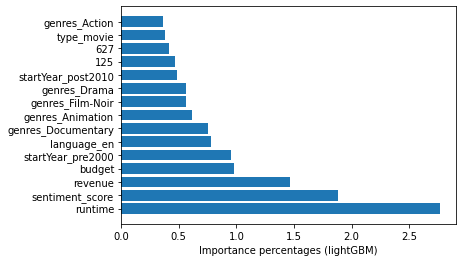

,Features,Importances
1,runtime,2.766667
864,sentiment_score,1.883333
3,revenue,1.466667
2,budget,0.983333
13,startYear_pre2000,0.950000
46,language_en,0.783333
24,genres_Documentary,0.750000
20,genres_Animation,0.616667
28,genres_Film-Noir,0.566667
25,genres_Drama,0.566667


In [12]:
# feature importance score
feature_importances = (lgbm_best.feature_importances_ / sum(lgbm_best.feature_importances_)) * 100
results = pd.DataFrame({'Features': X_train.columns,
                        'Importances': feature_importances})
results.sort_values(by='Importances', inplace=True, ascending=False)
results = results.iloc[0:15]

ax = plt.barh(results['Features'], results['Importances'])
plt.xlabel('Importance percentages (lightGBM)')
plt.show()

results

### PFI

In [13]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lgbm_best).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0449 ± 0.0042,genres_Documentary
0.0290 ± 0.0043,sentiment_score
0.0281 ± 0.0067,runtime
0.0177 ± 0.0034,startYear_pre2000
0.0166 ± 0.0058,genres_Drama
0.0132 ± 0.0033,language_en
0.0117 ± 0.0028,revenue
0.0067 ± 0.0029,budget
0.0052 ± 0.0021,startYear_post2010
0.0048 ± 0.0021,genres_Film-Noir
